<a href="https://colab.research.google.com/github/KwonNayeon/medium-post-projects/blob/main/f1_wordcloud/generate_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Dive into Word Cloud Creation
This code links to the Medium post '*Deep Dive into Word Cloud Creation*'. Here, we'll show you how to create a word cloud using Python. The code covers data preparation and data visualization, focusing on various techniques for creating word clouds. By following along, you'll gain a better understanding of the technical aspects behind word cloud visualizations.

[Read the full article on Medium](https://medium.com/@nayeonkn0330/deep-dive-into-word-cloud-creation-c2fc7fc09c12)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import spacy
from PIL import Image
from matplotlib.colors import LinearSegmentedColormap
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load data and basic information of the data (EDA)
Before getting into the word cloud creation, let's first take a look at the data. We'll start by loading the data and then explore its basic information, such as the data structure, data types, and any missing values. This initial exploratory data analysis (EDA) will help us understand the data and identify any preprocessing that may be needed.

In [3]:
f1 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/F1/F1_tweets.csv")
f1.info()

<ipython-input-3-3ab40d5cbec3>:1: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  f1 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/F1/F1_tweets.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632388 entries, 0 to 632387
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         632382 non-null  object 
 1   user_location     443577 non-null  object 
 2   user_description  592917 non-null  object 
 3   user_created      632388 non-null  object 
 4   user_followers    632388 non-null  float64
 5   user_friends      632388 non-null  object 
 6   user_favourites   632388 non-null  object 
 7   user_verified     632388 non-null  object 
 8   date              632388 non-null  object 
 9   text              632388 non-null  object 
 10  hashtags          632360 non-null  object 
 11  source            632384 non-null  object 
 12  is_retweet        632384 non-null  object 
dtypes: float64(1), object(12)
memory usage: 62.7+ MB


In [4]:
f1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Zack Shephard,NaN,My opinions are mine ALONE. Venting is the onl...,2011-12-03 20:36:55,89.0,2598,212886,False,2021-08-01 23:59:18,The next great #F1 duo!!! @ESPNF1 https://t.co...,['F1'],Twitter for iPhone,False
1,Matteo Vannucci,NaN,"Free speech, free ideas, random thoughts",2010-05-28 01:02:32,10.0,40,8,False,2021-08-01 23:59:10,@F1 What if…Hamilton would have gone to the pi...,"['HungarianGP', 'F1']",Twitter for iPhone,False
2,Michelle,The Burbs,"likes- movies, candy, being lazy, formula 1, ...",2009-03-04 16:53:13,231.0,110,428,False,2021-08-01 23:58:48,This has been a tiring #f1 day... https://t.co...,['f1'],Twitter for Android,False
3,JoshWFC 🇧🇷,NaN,| JP10’s biggest fan | pronouns : João/Pedro |...,2021-04-05 16:14:53,156.0,443,2994,False,2021-08-01 23:58:11,Valteri Bottass tracking down Max Verstappen o...,['F1'],Twitter for iPhone,False
4,Ria Tagulinao,MNL,Fun-sized Filipina writer @Medium,2009-06-22 16:08:51,833.0,379,30891,False,2021-08-01 23:57:40,No words to describe the #HungarianGP so I wil...,"['HungarianGP', 'F1']",Twitter for iPhone,False


#### Examine the Date Column in Detail
Let's take a closer look at the date column in our data. Limiting the data to the first half of 2022 will help us focus on the relevant information.

In [5]:
# Check the minimum date
min_date = f1['date'].min()

# Check the maximum date
max_date = f1['date'].max()

# Display the results
print("Minimum date:", min_date)
print("Maximum date:", max_date)

Minimum date: 2021-07-25 01:37:44
Maximum date: ['MexicoGP', 'F1']


In [6]:
# Identify and remove incorrect data in the date column
# Step 1: Convert the 'date' column to datetime format, forcing errors to identify bad data
f1['date'] = pd.to_datetime(f1['date'], errors='coerce')

# Step 2: Identify rows where the conversion failed (non-date values become NaT)
invalid_dates = f1[f1['date'].isna()]

# Display the rows with invalid date entries
print("Invalid date entries:", invalid_dates)

# Step 3: Drop rows with invalid dates, if necessary
f1 = f1.dropna(subset=['date'])

# Now, re-check the minimum and maximum dates
min_date = f1['date'].min()
max_date = f1['date'].max()

# Display the results
print("Minimum date:", min_date)
print("Maximum date:", max_date)

Invalid date entries:                                                 user_name  \
199943                                           #TeamPsg   
213267                     Link ➡️https://t.co/WpePiMd8qs   
276116                                         Arsenal FC   
503588   toutes les batailles que le temps me force jo...   

              user_location user_description user_created  user_followers  \
199943  2012-02-11 20:32:27              372          335         12710.0   
213267  2021-10-29 05:43:10                0            2             4.0   
276116  2011-04-01 10:54:01            632.0          672          4909.0   
503588  2009-08-24 08:20:16            158.0           57           217.0   

       user_friends      user_favourites  \
199943        False  2021-11-08 15:40:27   
213267        False  2021-11-07 15:21:13   
276116        False  2021-11-21 15:33:41   
503588        False  2022-01-14 09:33:11   

                                            user_verified date  \

#### Count and Sort User Locations from F1 Tweets Dataset

In [7]:
f1['user_location'].value_counts()

,count
user_location,
United Kingdom,14560
"London, England",12027
Worldwide,11031
London,7507
Paris,7279
...,...
"Dumbarton, Scotland",1
🇧🇪🇶🇦,1
Sinnoh,1


In [8]:
location_counts = f1['user_location'].value_counts().reset_index()
location_counts.columns = ['user_location', 'count']
location_counts = location_counts[location_counts['user_location']!='NA']
location_counts = location_counts.sort_values(['count'],ascending=False)

# Display the DataFrame
print(location_counts)

            user_location  count
0          United Kingdom  14560
1         London, England  12027
2               Worldwide  11031
3                  London   7507
4                   Paris   7279
...                   ...    ...
23063   Kuala Muda, Kedah      1
23064  Bazel, Switzerland      1
23065       The South, UK      1
23066    GB and/or Sweden      1
34857       somewhere gay      1

[34858 rows x 2 columns]


## Pre-processing

#### Date Filtering (from Mar 01, 2022 to Jul 31, 2022)

This pre-processing step limits the analysis to the first half of the 2022 F1 season.





In [9]:
# Define the start and end dates
start_date = '2022-03-01'
end_date = '2022-07-31'

# Filter the DataFrame and reassign it back to the original DataFrame
f1 = f1[(f1['date'] >= start_date) & (f1['date'] <= end_date)]

# Now f1 contains only the data within the specified date range

In [10]:
# Now, re-check the minimum and maximum dates
min_date = f1['date'].min()
max_date = f1['date'].max()

# Display the results
print("Minimum date:", min_date)
print("Maximum date:", max_date)

Minimum date: 2022-03-07 00:47:04
Maximum date: 2022-07-09 23:59:47


#### Aggregating Locations by Country

This code snippet performs several steps to clean and standardize the 'user_location' data, grouping it by countries or regions for more accurate analysis.





In [11]:
# Ensure all values are strings
f1['user_location'] = f1['user_location'].astype(str).fillna('')

# Define a mapping dictionary for locations
location_mapping = {
    'United Kingdom': 'UK',
    'London, England': 'UK',
    'London': 'UK',
    'Walmer, Kent, UK': 'UK',
    'England, United Kingdom': 'UK',
    'England': 'UK',
    'Manchester': 'UK',
    'Essex': 'UK',
    'Paris': 'France',
    'Munster, Ireland': 'Ireland',
    'Worldwide': 'Worldwide',
    'Cape Town': 'South Africa',
    'Ireland': 'Ireland',
    'Miami': 'USA',
    'United States': 'USA',
    'BAKU': 'Azerbaijan',
    'Dallas, Texas': 'USA',
    'Los Angeles, CA': 'USA',
    'nan': 'Worldwide',
    'Oslo': 'Norway',
    'Mumbai': 'India'
}

# Apply the mapping to the 'user_location' column
f1['user_location'] = f1['user_location'].map(location_mapping).fillna(f1['user_location'])

# Define a function to aggregate locations using regex
def aggregate_locations(location):
    if isinstance(location, str):
        if re.search(r'London|England|UK|United Kingdom|Kent|Essex', location, re.IGNORECASE):
            return 'UK'
        elif re.search(r'Paris|France', location, re.IGNORECASE):
            return 'France'
        elif re.search(r'Ireland', location, re.IGNORECASE):
            return 'Ireland'
        elif re.search(r'Worldwide|nan', location, re.IGNORECASE):
            return 'Worldwide'
        elif re.search(r'Miami|United States|USA|Dallas, Texas|Los Angeles, CA', location, re.IGNORECASE):
            return 'USA'
        elif re.search(r'Cape Town', location, re.IGNORECASE):
            return 'South Africa'
        elif re.search(r'BAKU|Azerbaijan', location, re.IGNORECASE):
            return 'Azerbaijan'
        elif re.search(r'Oslo', location, re.IGNORECASE):
            return 'Norway'
        elif re.search(r'Mumbai', location, re.IGNORECASE):
            return 'India'
        else:
            return location
    else:
        return 'Unknown'  # Handle cases where location is not a string

# Apply the function to the 'user_location' column
f1['user_location'] = f1['user_location'].apply(aggregate_locations)


<ipython-input-11-3224ebd6e397>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['user_location'] = f1['user_location'].astype(str).fillna('')
<ipython-input-11-3224ebd6e397>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['user_location'] = f1['user_location'].map(location_mapping).fillna(f1['user_location'])


In [12]:
location_counts = f1['user_location'].value_counts().reset_index()
location_counts.columns = ['user_location', 'count']
location_counts = location_counts[location_counts['user_location']!='NA']
location_counts = location_counts.sort_values(['count'],ascending=False)

# Display the DataFrame
location_counts.head(10)

,user_location,count
0,Worldwide,36169
1,UK,16791
2,USA,4663
3,India,1094
4,South Africa,789
5,Ireland,619
6,France,476
7,Australia,442
8,Norway,426
9,Nigeria,369


## Data Visualization

### Bar plot of location distribution after applying location mapping

<ipython-input-13-4e1d0814a1b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


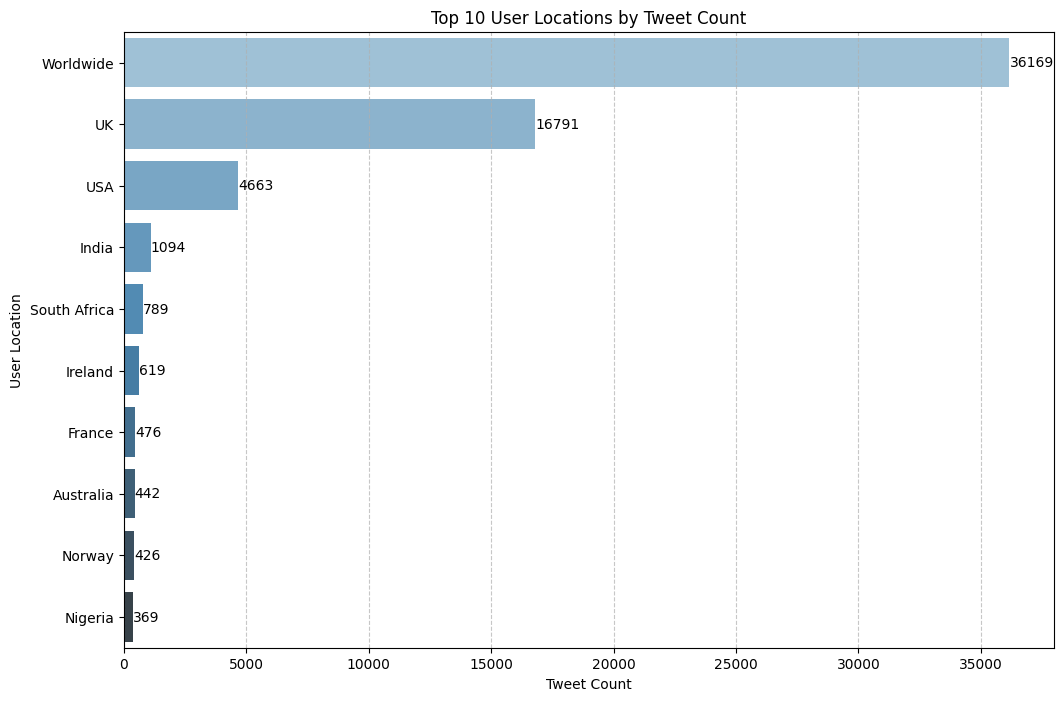

In [13]:
# Plot the top 10 user locations as a horizontal bar chart
plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(
    x='count', y='user_location', data=location_counts[:10],
    palette='Blues_d'  # Use a blue color palette for the bars
)

# Add labels to the plot
plt.xlabel('Tweet Count')  # Label for the x-axis
plt.ylabel('User Location')  # Label for the y-axis
plt.title('Top 10 User Locations by Tweet Count')  # Title of the plot
plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Add gridlines for readability

# Add count values on the bars
for index, value in enumerate(location_counts['count'][:10]):
    plt.text(value, index, f'{value}', va='center')  # Display count values on the bars

# Save the plot as a PNG file before showing it
plt.savefig('user_location_plot_edited.png', format='png', bbox_inches='tight', dpi=300)  # Save with high resolution

plt.show()  # Display the plot

### Word Cloud

#### Word Cloud of F1 Tweets (Basic, Without User Tuning)

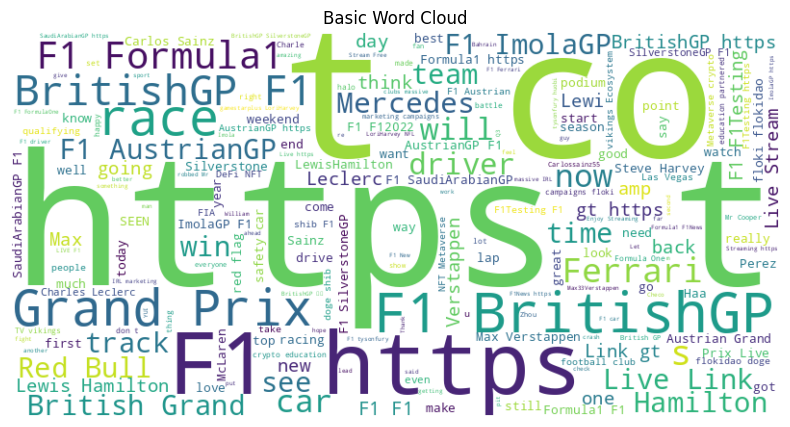

In [14]:
# Ensure that the 'text' column contains strings and handle NaN values
f1['text'] = f1['text'].astype(str).fillna('')

# Combine all text data into a single string
all_text = ' '.join(f1['text'])

# Generate a basic word cloud
wordcloud = WordCloud(
    width=800,  # Set the width of the word cloud
    height=400,  # Set the height of the word cloud
    background_color='white'  # Set the background color
).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))  # Adjust the figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Smooth rendering
plt.axis('off')  # Hide the axis
plt.title('Basic Word Cloud')  # Add a title
plt.show()  # Render the plot

#### Basic Word Cloud of F1 Tweets with Custom Stopwords



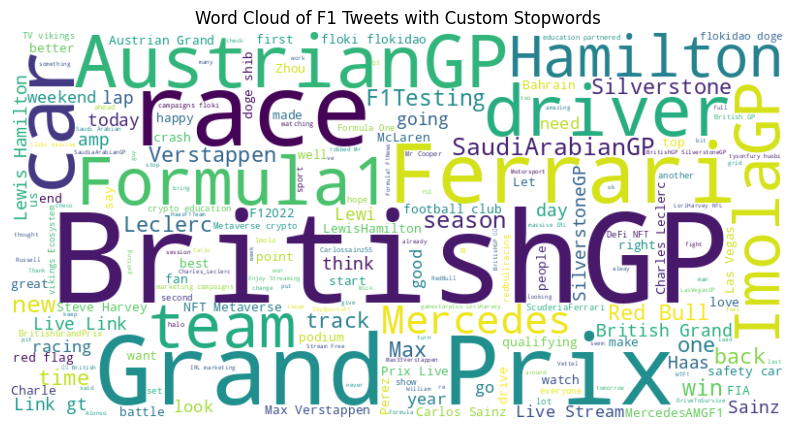

In [15]:
# Define custom stopwords
custom_stopwords = set(STOPWORDS).union({
    'RT', 'https', 'the', 'and', 'of', 'to', 'will', 'much', 'see', 'now', 'seen',
    'come', 'know', 'haa', 'football club', 'even', 't', 'co', 'f1oki f1okidao',
    'far', 'take', 'don', 'f1okidao', 'f1okidao doge', 'thing',
    'got', 'really', 's', 'u', 'still', 'way', 'f1'
})

# Combine all text data into a single string without changing case
all_text = ' '.join(f1['text'].fillna(''))

# Remove unnecessary variations and normalize terms like "F1"
all_text = re.sub(r'\bf1\b', 'F1', all_text, flags=re.IGNORECASE)  # Replace "f1" with "F1"
all_text = re.sub(r'#f1\b', 'F1', all_text, flags=re.IGNORECASE)  # Replace #f1 with F1
all_text = re.sub(r'\bf1gp\b', 'F1', all_text, flags=re.IGNORECASE)  # Replace f1gp with F1

# Generate the word cloud using the custom stopwords and colormap
wordcloud = WordCloud(
    width=800,
    height=400,
    stopwords=custom_stopwords,  # Apply custom stopwords
    background_color='white',  # White background for contrast
    colormap='viridis'  # Custom colormap
).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))  # Adjust the figure size for better display
plt.imshow(wordcloud, interpolation='bilinear')  # Smooth rendering
plt.axis('off')  # Hide the axis
plt.title('Word Cloud of F1 Tweets with Custom Stopwords')  # Add a title
plt.show()  # Render the plot

#### Word Cloud of F1 Tweets with Custom Colormap and Custom Stopwords

In [16]:
# Define an F1-themed colormap
f1_theme_cmap = LinearSegmentedColormap.from_list('f1_theme', ['#00D2BE', '#000000', '#C0C0C0'])  # teal, black, silver
f1_theme_cmap_r = LinearSegmentedColormap.from_list('f1_theme_r', ['#FF0000', '#FFFFFF', '#000000'])  # red, white, black

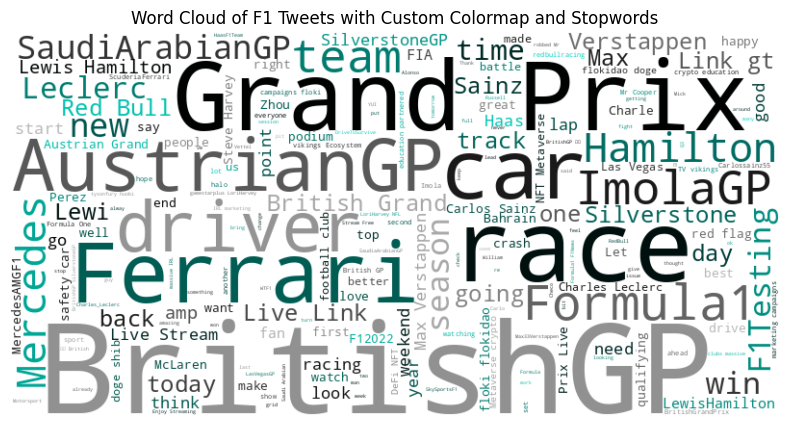

In [17]:
# Generate the word cloud using the custom colormap and stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    stopwords=custom_stopwords,  # Apply custom stopwords
    background_color='white',  # White background for contrast
    colormap=f1_theme_cmap  # Use the custom colormap
).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))  # Adjust figure size for better display
plt.imshow(wordcloud, interpolation='bilinear')  # Smooth rendering
plt.axis('off')  # Hide the axis
plt.title('Word Cloud of F1 Tweets with Custom Colormap and Stopwords')  # Add a title
plt.show()  # Render the plot

#### Enhanced F1 Tweet Word Cloud: Custom Stopwords, Colormap, and Mask Image

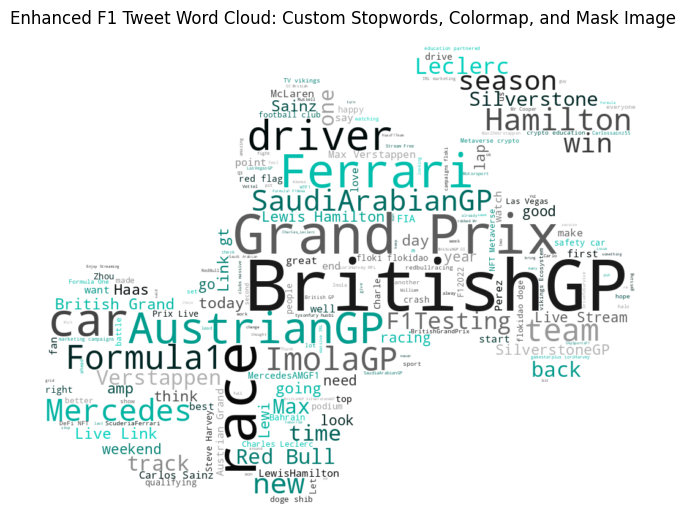

In [18]:
# Define the path to the mask image
mask_path = '/content/gdrive/MyDrive/Colab Notebooks/F1/racing.png'  # Update this path to your mask image location

# Load the mask image
mask_image = np.array(Image.open(mask_path))

# Generate the word cloud with the F1 colormap
wordcloud = WordCloud(
    width=mask_image.shape[1],  # Match the mask image width
    height=mask_image.shape[0],  # Match the mask image height
    background_color='white',  # Light background for contrast
    colormap=f1_theme_cmap,  # Use a predefined colormap name
    stopwords=custom_stopwords,
    mask=mask_image
).generate(all_text)

# Display the word cloud
plt.figure(figsize=(11.25, 6.25))  # Adjust figure size for better display
plt.imshow(wordcloud, interpolation='bilinear')  # Smooth rendering
plt.axis('off')  # Hide the axis
plt.title('Enhanced F1 Tweet Word Cloud: Custom Stopwords, Colormap, and Mask Image')  # Add a title
plt.show()  # Render the plot